# Data Analysis : Rice Production in Indonesia 2020-2022
## By: Risdan Kristori

### Import Data 

In [327]:
import pandas as pd
df = pd.read_csv("Rice Production Indonesia 2020-2022.csv")
df.head(5)

,Provinsi,Year,Yield.Areal(ha),Productivity(kw/ha),Production.(ton)
0,ACEH,2020,317869.41,55.28,1757313.07
1,SUMATERA UTARA,2020,388591.22,52.51,2040500.19
2,SUMATERA BARAT,2020,295664.47,46.92,1387269.29
3,RIAU,2020,64733.13,37.64,243685.04
4,JAMBI,2020,84772.93,45.58,386413.49


In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Provinsi             102 non-null    object 
 1   Year                 102 non-null    int64  
 2   Yield.Areal(ha)      102 non-null    float64
 3   Productivity(kw/ha)  102 non-null    float64
 4   Production.(ton)     102 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.1+ KB


<h3>Data fields:</h3>

- Provinsi >> Provinces in Indonesia
- Year >> 2020 to 2022
- Yield.Areal(ha) >>> land use for Rice
- Productivity(kw/ha) >>> rice yield in every year 2020 to 2022 in each province
- Production.(ton) >>> rice yields in each province

In [329]:
numeric_descr = (
    df.drop(['Year'], axis=1)
    .describe(percentiles=[0.25, 0.50, 0.75])
    .T.rename(columns=str.title)
)

round(numeric_descr,2)

,Count,Mean,Std,Min,25%,50%,75%,Max
Yield.Areal(ha),102.0,309036.75,472722.86,179.48,51472.41,111623.90,296709.90,1754380.30
Productivity(kw/ha),102.0,45.26,8.38,28.24,39.08,46.52,51.66,60.59
Production.(ton),102.0,1606014.43,2667462.59,506.91,228941.59,531098.76,1579799.25,9944538.26


In [330]:
df.describe(include='object')

,Provinsi
count,102
unique,34
top,ACEH
freq,3


EDA Idea:
- Production year by year for every province
- Production most increase and decrease province
- 

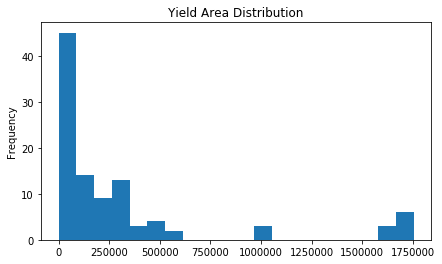

In [331]:
df["Yield.Areal(ha)"].plot.hist(bins=20, figsize=(7,4), title="Yield Area Distribution")

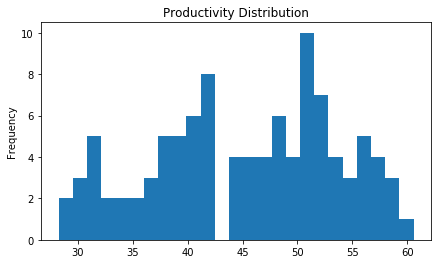

In [332]:
df["Productivity(kw/ha)"].plot.hist(bins=25, figsize=(7,4), title="Productivity Distribution")

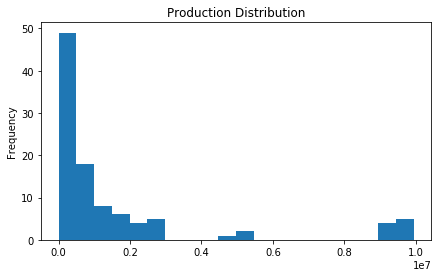

In [333]:
df["Production.(ton)"].plot.hist(bins=20, figsize=(7,4), title="Production Distribution")

In [334]:
df[df['Yield.Areal(ha)']>1500000]

,Provinsi,Year,Yield.Areal(ha),Productivity(kw/ha),Production.(ton)
11,JAWA BARAT,2020,1586888.63,56.82,9016772.58
12,JAWA TENGAH,2020,1666931.49,56.93,9489164.62
14,JAWA TIMUR,2020,1754380.30,56.68,9944538.26
45,JAWA BARAT,2021,1604109.31,56.81,9113573.08
46,JAWA TENGAH,2021,1696712.36,56.69,9618656.81
48,JAWA TIMUR,2021,1747481.20,56.02,9789587.67
79,JAWA BARAT,2022,1662404.00,56.75,9433723.00
80,JAWA TENGAH,2022,1688670.00,55.41,9356445.00
82,JAWA TIMUR,2022,1693211.00,56.26,9526516.00


In [335]:
df[df['Production.(ton)']>8000000]

,Provinsi,Year,Yield.Areal(ha),Productivity(kw/ha),Production.(ton)
11,JAWA BARAT,2020,1586888.63,56.82,9016772.58
12,JAWA TENGAH,2020,1666931.49,56.93,9489164.62
14,JAWA TIMUR,2020,1754380.30,56.68,9944538.26
45,JAWA BARAT,2021,1604109.31,56.81,9113573.08
46,JAWA TENGAH,2021,1696712.36,56.69,9618656.81
48,JAWA TIMUR,2021,1747481.20,56.02,9789587.67
79,JAWA BARAT,2022,1662404.00,56.75,9433723.00
80,JAWA TENGAH,2022,1688670.00,55.41,9356445.00
82,JAWA TIMUR,2022,1693211.00,56.26,9526516.00


### 1. Production by Year 

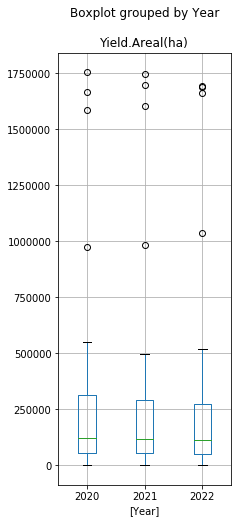

In [336]:
df[["Yield.Areal(ha)","Year"]].boxplot(by="Year", figsize=(3, 8))

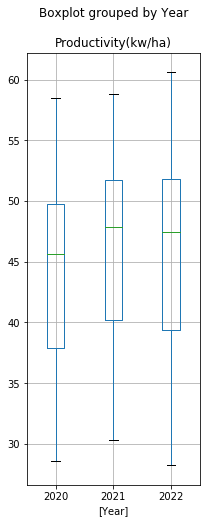

In [337]:
df[["Productivity(kw/ha)","Year"]].boxplot(by="Year", figsize=(3, 8))

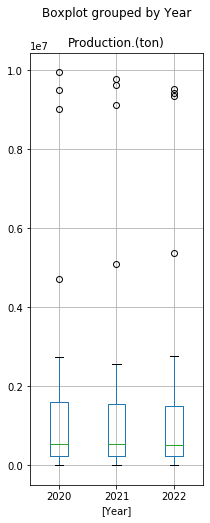

In [338]:
df[["Production.(ton)","Year"]].boxplot(by="Year", figsize=(3, 8))

In [339]:
df[["Production.(ton)","Yield.Areal(ha)","Year"]].groupby('Year').sum()

,Production.(ton),Yield.Areal(ha)
Year,,
2020,54649202.24,10657274.96
2021,54415294.22,10411801.22
2022,54748975.85,10452672.35


### 2. Province with most productive every year

In [340]:
df[df['Year']==2020].sort_values(by='Production.(ton)', ascending=False).head(3)

,Provinsi,Year,Yield.Areal(ha),Productivity(kw/ha),Production.(ton)
14,JAWA TIMUR,2020,1754380.30,56.68,9944538.26
12,JAWA TENGAH,2020,1666931.49,56.93,9489164.62
11,JAWA BARAT,2020,1586888.63,56.82,9016772.58


In [341]:
df[df['Year']==2021].sort_values(by='Production.(ton)', ascending=False).head(3)

,Provinsi,Year,Yield.Areal(ha),Productivity(kw/ha),Production.(ton)
48,JAWA TIMUR,2021,1747481.20,56.02,9789587.67
46,JAWA TENGAH,2021,1696712.36,56.69,9618656.81
45,JAWA BARAT,2021,1604109.31,56.81,9113573.08


In [342]:
df[df['Year']==2022].sort_values(by='Production.(ton)', ascending=False).head(3)

,Provinsi,Year,Yield.Areal(ha),Productivity(kw/ha),Production.(ton)
82,JAWA TIMUR,2022,1693211.0,56.26,9526516.0
79,JAWA BARAT,2022,1662404.0,56.75,9433723.0
80,JAWA TENGAH,2022,1688670.0,55.41,9356445.0


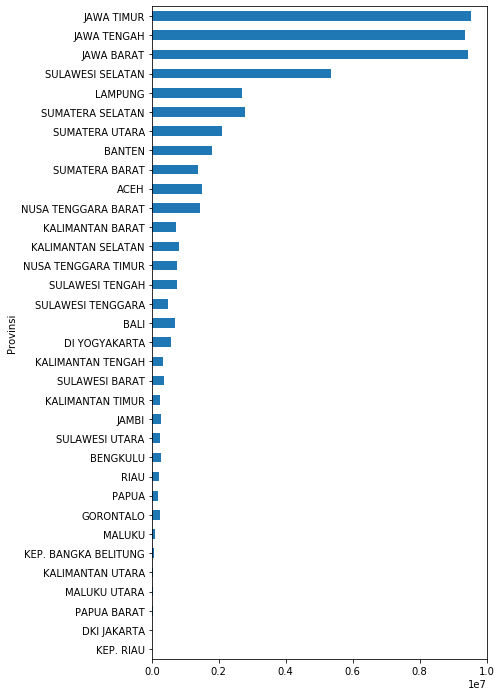

In [361]:
df_prod_2022 = df[df['Year']==2022].sort_values(by='Yield.Areal(ha)').set_index('Provinsi')
df_prod_2022['Production.(ton)'].plot(kind='barh', figsize=(6,12))

In [362]:
df_prod_2022

,Year,Yield.Areal(ha),Productivity(kw/ha),Production.(ton)
Provinsi,,,,
KEP. RIAU,2022,179.48,28.24,506.91
DKI JAKARTA,2022,477.25,48.98,2337.77
PAPUA BARAT,2022,5460.59,43.89,23963.92
MALUKU UTARA,2022,6416.45,38.16,24486.03
KALIMANTAN UTARA,2022,8604.19,35.49,30533.59
KEP. BANGKA BELITUNG,2022,15107.80,40.66,61425.07
MALUKU,2022,23987.82,38.60,92601.06
GORONTALO,2022,46823.47,51.29,240134.50
PAPUA,2022,49741.91,38.99,193943.50


### 3. Production Difference from 2020 to 2022

In [343]:
provinces = []
production_diff = []
yield_diff = []
productivity_diff = []

for province in df.Provinsi.unique():
    diff1 = 100*(df[df["Provinsi"]==province].iloc[2,2] - df[df["Provinsi"]==province].iloc[0,2])/df[df["Provinsi"]==province].iloc[0,2]
    diff2 = 100*(df[df["Provinsi"]==province].iloc[2,3] - df[df["Provinsi"]==province].iloc[0,3])/df[df["Provinsi"]==province].iloc[0,3]
    diff3 = 100*(df[df["Provinsi"]==province].iloc[2,4] - df[df["Provinsi"]==province].iloc[0,4])/df[df["Provinsi"]==province].iloc[0,4]
    provinces.append(province)
    yield_diff.append(round(diff1,2))
    productivity_diff.append(round(diff2,2))
    production_diff.append(round(diff3,2))
    
df_diff = pd.DataFrame(list(zip(yield_diff, productivity_diff, production_diff)), index=provinces,
               columns =['yield_diff', 'productivity_diff', 'production_diff'])

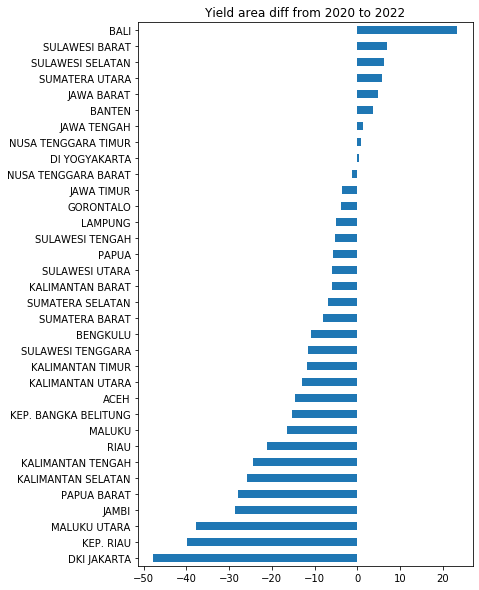

In [344]:
df_diff.sort_values(by='yield_diff')['yield_diff'].plot(kind='barh', figsize=(6,10), title="Yield area diff from 2020 to 2022")

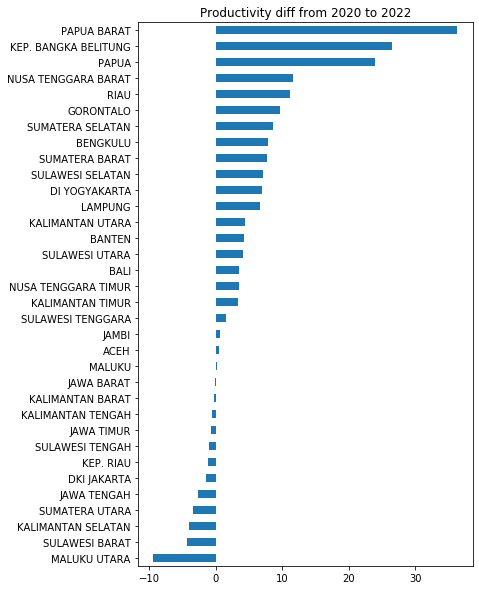

In [345]:
df_diff.sort_values(by='productivity_diff')['productivity_diff'].plot(kind='barh', figsize=(6,10), title="Productivity diff from 2020 to 2022")

AxesSubplot(0.125,0.125;0.775x0.755)


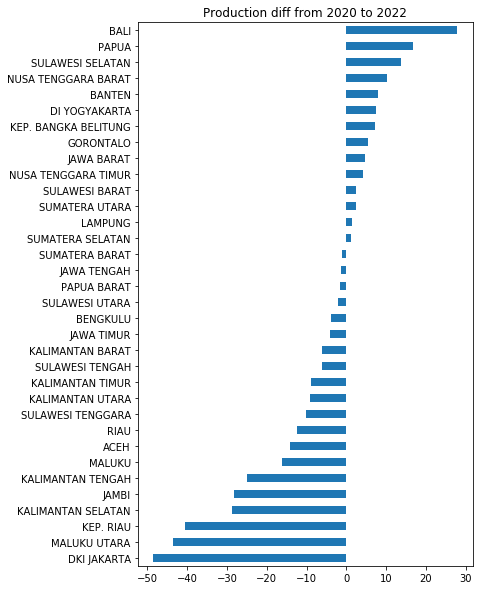

In [346]:
print(df_diff.sort_values(by='production_diff')['production_diff'].plot(kind='barh', figsize=(6,10), title="Production diff from 2020 to 2022"))

In [347]:
df_diff

,yield_diff,productivity_diff,production_diff
ACEH,-14.51,0.49,-14.10
SUMATERA UTARA,5.89,-3.33,2.36
SUMATERA BARAT,-8.04,7.67,-0.99
RIAU,-21.13,11.13,-12.36
JAMBI,-28.59,0.66,-28.12
SUMATERA SELATAN,-6.88,8.66,1.17
BENGKULU,-10.89,7.91,-3.83
LAMPUNG,-4.93,6.68,1.43
KEP. BANGKA BELITUNG,-15.32,26.55,7.15
KEP. RIAU,-39.88,-1.12,-40.54


In [348]:
num = df[df['Year']==2022].drop(["Provinsi","Year"], axis=1).sum()
denom = df[df['Year']==2020].drop(["Provinsi","Year"], axis=1).sum()
100*(num - denom)/num

Yield.Areal(ha)       -1.957419
Productivity(kw/ha)    3.954657
Production.(ton)       0.182238
dtype: float64

In [ ]:
df.sort_values(by=)